# NLP Capstone 

For this project, I decided create a classifier for classifing 10 different text from 10 different authors. The goals of the project are to use different techiniques to find what technique works the best. I test supervised learning methods and then combine those methods with unsupervised learning feature generation methods to further improve the preformance of the supervised learning models. In addition, I test culstering methods and unsupervised leraning methods like lsa and sentence similarity. 

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk

nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [0]:
# Import the data we just downloaded and installed.
from nltk.corpus import gutenberg, stopwords
import nltk
nltk.download('punkt')
# Grab and process the raw data.
print(gutenberg.fileids())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [0]:
# reading in the data 
burgess=gutenberg.raw('burgess-busterbrown.txt')
sense=gutenberg.raw('austen-sense.txt')
bible=gutenberg.raw('bible-kjv.txt')
blake=gutenberg.raw('blake-poems.txt')
whitman=gutenberg.raw('whitman-leaves.txt')
milton=gutenberg.raw('milton-paradise.txt')
byrant=gutenberg.raw('bryant-stories.txt')
caesar=gutenberg.raw('shakespeare-caesar.txt')
ball=gutenberg.raw('chesterton-ball.txt')
moby=gutenberg.raw('melville-moby_dick.txt')
parents=gutenberg.raw('edgeworth-parents.txt')


In [0]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--''
    text = re.sub(r'--',' ',text)
    text = re.sub(r'--',' ',text)
    text = re.sub("[@#+%*:()'-]", ' ', text)
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    
    text = ' '.join(text.split())
    return text
  
  
parents = text_cleaner(parents[500:50000])
ball = text_cleaner(ball[500:50000])
caesar = text_cleaner(caesar[500:50000])
byrant = text_cleaner(byrant[500:50000])
milton = text_cleaner(milton[500:60000])
blake = text_cleaner(blake[500:50000])
bible = text_cleaner(bible[500:50000])
sense = text_cleaner(sense[500:50000])
burgess = text_cleaner(burgess[500:50000])
moby = text_cleaner(moby[500:50000])

In [0]:
#parsing data
nlp = spacy.load('en')

parents_doc = nlp(parents)
ball_doc = nlp(ball)
caesar_doc = nlp(caesar)
byrant_doc = nlp(byrant)
milton_doc = nlp(milton)
blake_doc = nlp(blake)
bible_doc = nlp(bible)
sense_doc = nlp(sense)
burgess_doc = nlp(burgess)
moby_doc = nlp(moby)


In [0]:
moby_sents = [[sents, "moby"] for sents in moby_doc.sents]
burgess_sents = [[sents,"burgess"]for sents in burgess_doc.sents]
sense_sents = [[sents, 'sense'] for sents in sense_doc.sents]
bible_sents = [[sents, 'bible'] for sents in bible_doc.sents]
blake_sents = [[sents, 'blake'] for sents in blake_doc.sents]
milton_sents = [[sents, 'milton'] for sents in milton_doc.sents]
byrant_sents = [[sents, 'byrant'] for sents in byrant_doc.sents]
caesar_sents = [[sents, 'caesar'] for sents in caesar_doc.sents]
ball_sents = [[sents, 'ball'] for sents in ball_doc.sents]
parents_sents = [[sents, 'parents'] for sents in parents_doc.sents]

In [0]:
# Balancing Sentences
print(len(moby_sents))
print(len(burgess_sents))
print(len(bible_sents))
print(len(blake_sents))
print(len(milton_sents))
print(len(sense_sents))
print(len(milton_sents))
print(len(byrant_sents))  
print(len(caesar_sents))
print(len(ball_sents))
print(len(parents_sents))

692
761
742
600
457
458
457
796
969
594
434


In [0]:
# balancing sentences and lowering number of sentences 
moby_sents = moby_sents[:300]
burgess_sents = burgess_sents[:300]
sense_sents = sense_sents[:300]
bible_sents = bible_sents[:300]
blake_sents = blake_sents[:300]
milton_sents = milton_sents[:300]
byrant_sents = byrant_sents[:300]
caesar_sents = caesar_sents[:300]
ball_sents = ball_sents[:300]
parents_sents = parents_sents[:300]

In [0]:
moby_sents = moby_sents[:200]
burgess_sents = burgess_sents[:200]
sense_sents = sense_sents[:200]
bible_sents = bible_sents[:200]
blake_sents = blake_sents[:200]
milton_sents = milton_sents[:200]
byrant_sents = byrant_sents[:200]
caesar_sents = caesar_sents[:200]
ball_sents = ball_sents[:200]
parents_sents = parents_sents[:200]

In [0]:
sentences = pd.DataFrame(moby_sents+burgess_sents+sense_sents+bible_sents+blake_sents+milton_sents+byrant_sents+caesar_sents+ball_sents+parents_sents)

In [0]:
# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(1000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

# Set up the bags.
mobywords = bag_of_words(moby_doc)
parentswords = bag_of_words(parents_doc)
burgesswords = bag_of_words(burgess_doc)
sensewords = bag_of_words(sense_doc)
miltonwords = bag_of_words(milton_doc)
blakewords = bag_of_words(blake_doc)
byrantwords = bag_of_words(byrant_doc) 
ballwords = bag_of_words(ball_doc) 
biblewords = bag_of_words(bible_doc)
caesarwords = bag_of_words(caesar_doc)

In [0]:
# Combine bags to create a set of unique words.
common_words = set(mobywords + parentswords + burgesswords + sensewords + miltonwords + blakewords + byrantwords + ballwords + biblewords + caesarwords)

In [0]:
# GROUP INTO PARAGRAPHS
# THEN COMBINE INTO A DATA FRAME 
# Create our data frame with features. This can take a while to run.
word_counts = bow_features(sentences, common_words)
word_counts.head()



Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450
Processing row 500
Processing row 550
Processing row 600
Processing row 650
Processing row 700
Processing row 750
Processing row 800
Processing row 850
Processing row 900
Processing row 950
Processing row 1000
Processing row 1050
Processing row 1100
Processing row 1150
Processing row 1200
Processing row 1250
Processing row 1300
Processing row 1350
Processing row 1400
Processing row 1450
Processing row 1500
Processing row 1550
Processing row 1600
Processing row 1650
Processing row 1700
Processing row 1750
Processing row 1800
Processing row 1850
Processing row 1900
Processing row 1950


,weigh,Sunflower,thin,moustache,future,clap,raven,painful,Parish,ducat,Milcah,schoolmaster,nameless,straight,dragon,bladder,keen,Jubal,monster,sum,Mr,Mercy,dimple,caution,fruitful,wonderful,APOLOGY,stale,sinner,voiceless,week,employment,house,private,room,vote,courageous,vineyard,fame,Arkite,...,groping,Cinna,article,church,timed,measure,disapprove,bereave,certainly,closet,pluck,forget,soft,Triumph,innate,didst,Cold,dawn,Ham,wounding,Marks,guinea,alteration,Sinite,expect,laugh,plough,kill,ta,blackberry,Abimael,take,Perizzite,faster,Mightiest,bent,bandy,parliament,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(h, them, by, what, name, a, whale, fish, is, ...",moby
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"("", HACKLUYT, "", WHALE, .)",moby
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(...),moby
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(Sw, .)",moby
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(and, Dan, .)",moby


In [0]:
word_counts = bow_features(sentences, common_words)
word_counts.head()



Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450
Processing row 500
Processing row 550
Processing row 600
Processing row 650
Processing row 700
Processing row 750
Processing row 800
Processing row 850
Processing row 900
Processing row 950
Processing row 1000
Processing row 1050
Processing row 1100
Processing row 1150
Processing row 1200
Processing row 1250
Processing row 1300
Processing row 1350
Processing row 1400
Processing row 1450
Processing row 1500
Processing row 1550
Processing row 1600
Processing row 1650
Processing row 1700
Processing row 1750
Processing row 1800
Processing row 1850
Processing row 1900
Processing row 1950


,7000L,ANGEL,cellar,fierceness,morter,ragge,sevenfold,buffet,dell,irreconcilable,prominently,fallen,rushy,disinclination,essence,mayest,week,Toad,orient,mansion,chivalry,oven,wolvish,utmost,mane,monstrous,jesting,compliment,spirit,paint,lift,reverie,humiliation,poor,highly,repute,disposed,surf,drinke,SIXTH,...,ugly,properly,kingdom,Hebrew,freeze,tap,displeas,Marks,doubtful,empyreal,"1,119",icy,calmly,scolding,Park,begone,perch,hearte,accord,pitch,presse,return,entertaining,mount,FEGEE,Harpoons,Falling,Irad,bee,mildly,fiend,Neats,Frog,leave,fellow,idea,frequently,particular,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"(h, them, by, what, name, a, whale, fish, is, ...",moby
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"("", HACKLUYT, "", WHALE, .)",moby
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(...),moby
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(Sw, .)",moby
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(and, Dan, .)",moby


After this computationally intensive and time consuming process of processeing the data, cleaning the data, forming a bag of words for each text and combing the bags into a dataframe, the dataset is now ready to be used in clustering analysis. In this section I will test k-means method of clutering to see how well clustering techniques are when it comes to classifying the different text. 

## Clustering Analysis 


In this 

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

Y = word_counts['text_source']
X = word_counts.drop(['text_sentence','text_source'], 1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

#fitting the model wsith 10 clusters 10 authors
kmeans_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_train)

#Print cross tab of data vs prediction
print('Comparing K-Means Clusters to Authors:')
print(pd.crosstab(y_train, kmeans_pred))

Comparing K-Means Clusters to Authors:
col_0        0   1   2   3  4  5   6   7   8    9
text_source                                      
ball         0  26   0   3  0  1   5   7   3  261
bible        0  29   1  28  0  0   0   6   0  234
blake        0   2  14   1  0  1  21  21   0  249
burgess      0  13   0   0  0  0  29  18  30  193
byrant       0  41   1   0  0  5  56   5  13  194
caesar       0   3   0   0  0  1   0   4   1  285
milton       0   1   0   1  0  0   0  31   0  268
moby         1   4   1   0  0  1   1  12   1  279
parents      0  25   3   0  4  0  17  21   3  219
sense        0   9   0   0  0  0   6  33   0  254


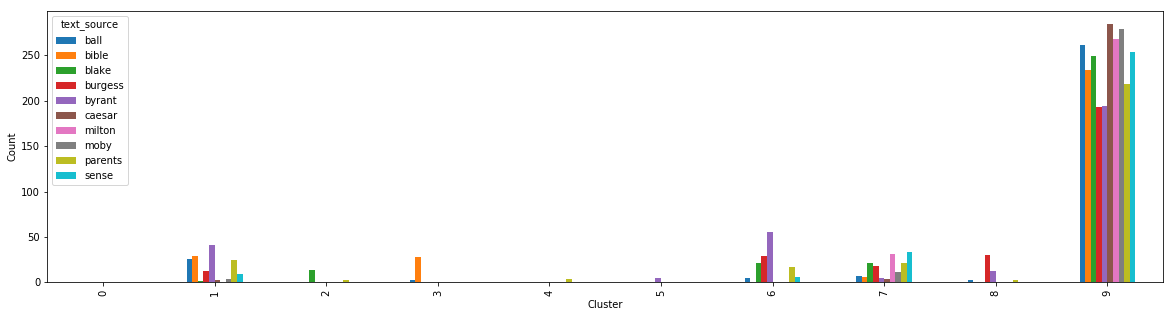

In [0]:
#Show authors categorized by cluster
p_y = pd.crosstab(kmeans_pred, y_train)
p_y.plot(kind='bar', stacked=False, figsize=[20,5])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

While some cluster were able to be dominated by specific authors, the k-means method of clustering failed in the task of classifying the correct text for each author. The majory of the text ended up being in a specific cluster and clusters 4 and 5 were almost empty. The results of this method may mean that custering overall may not be the best for this task. In the next section, I will test supervised learning models in classifying the different text relying only on wordcounts through the bag of words method. 

# Random Forest Model 


In [0]:
sfrom sklearn import ensemble
from sklearn.model_selection import GridSearchCV
rfc = ensemble.RandomForestClassifier()

y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

param_grid = { 
    'n_estimators': [15, 200, 500, 750, 1000, 1500],
    'max_features': [1,2,4,6,7,8],
    'max_depth': [4,5,6,7,8]
}


grid = GridSearchCV(rfc, param_grid, cv=5, verbose=3, n_jobs=-1)

grid.fit(X,y)

# Show the best parameter and best score 
print(grid.best_params_)
print( grid.best_score_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 56.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 65.2min finished


{'max_depth': 8, 'max_features': 8, 'n_estimators': 500}
0.29772656493304267


In [0]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rfc = ensemble.RandomForestClassifier(n_estimators=1500, max_features= 8, max_depth=8)
Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))


from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=200, max_features= 4, max_depth=4)

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2, random_state=100)
print('With 20% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X, Y).score(X, Y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, X, Y, cv=5))


from sklearn.metrics import classification_report
print('Random Forest report :')
print(classification_report(y_test, rfc.predict(X_test)))



With 20% Holdout: 0.18351477449455678
Testing on Sample: 0.22454064154469014
[0.16614907 0.22049689 0.20839813 0.21028037 0.18338558]
Random Forest report :
              precision    recall  f1-score   support

        ball       0.00      0.00      0.00        52
       bible       1.00      0.01      0.03        71
       blake       1.00      0.03      0.05        77
      byrant       1.00      0.04      0.07        83
      caesar       0.79      0.42      0.54        89
        emma       0.00      0.00      0.00        59
      milton       0.00      0.00      0.00        34
        moby       0.17      1.00      0.29       102
     parents       0.00      0.00      0.00        37
       sense       0.00      0.00      0.00        39

    accuracy                           0.23       643
   macro avg       0.40      0.15      0.10       643
weighted avg       0.50      0.23      0.14       643



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The random forest model did not perfrom well and may mean that this is not the 


best model for this task. 

# Logistic Regression Model

In [0]:
# Logistic Regression Gridsearch cv 
# Model 3: Random Forest gridsearchcv   

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

logr = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = (0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000)

# Create hyperparameter options
parameters = dict(C=C, penalty=penalty)

# Use GS-CV to see which alpha level is best.

logr_grid = GridSearchCV(logr, parameters, cv=5, verbose=1)

#Fit the logistic regression 
logr_grid.fit(X, y)

#return best parameters and best score

print(logr_grid.best_params_)
print(logr_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sk

{'C': 1, 'penalty': 'l2'}
0.6115


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1,penalty='l1') # No need to specify l2 as it's the default. But we put it for demonstration.

Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.4, random_state=100)
print('With 20% Holdout: ' + str(lr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(lr.fit(X, Y).score(X, Y)))





# Cross validating using 5 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, X, Y, cv=5))


from sklearn.metrics import classification_report
print('Logistic Regression Report :')
print(classification_report(y_test, lr.predict(X_test)))

While there are significant gaps between the holdout group, the test sample, and the results of the cross validation, the logistic regression model perfromed very well. 

#Gradient Boosted Classifier 

In [0]:
# Parameters to test in gridsearch cv 

from sklearn import ensemble
from sklearn.model_selection import GridSearchCV


params = {'n_estimators': [50, 100, 150, 200, 300, 500,750],
                           
          'max_depth': [4,5,6,7,8],
         }


y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))



# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier()

# Use the grid
gb_grid = GridSearchCV(gb, params, cv=3, verbose=1, n_jobs=1)

# Fit the grid
gb_grid.fit(X, y)

# Return best parameters and best score
print(gb_grid.best_params_)
print(gb_grid.best_score_)

In [0]:
from sklearn import ensemble
gb = ensemble.GradientBoostingClassifier()

y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=20)
print('With 20% Holdout: ' + str(gb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(gb.fit(X, y).score(X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb,X, y, cv=5))


from sklearn.metrics import classification_report
print('Gradient Boosted report :')
print(classification_report(y_test, gb.predict(X_test)))

With 20% Holdout: 0.603112840466926
Testing on Sample: 0.8069137340392402
[0.43944099 0.54968944 0.57076205 0.49688474 0.5015674 ]
Gradient Boosted report :
              precision    recall  f1-score   support

        ball       1.00      0.76      0.87       131
       bible       0.97      0.99      0.98       140
       blake       0.97      0.71      0.82       173
      byrant       0.89      0.69      0.78       156
      caesar       1.00      0.75      0.86       187
        emma       0.99      0.75      0.85       103
      milton       1.00      0.90      0.95        58
        moby       0.45      0.99      0.62       185
     parents       1.00      0.77      0.87        69
       sense       0.98      0.76      0.86        83

    accuracy                           0.81      1285
   macro avg       0.93      0.81      0.84      1285
weighted avg       0.90      0.81      0.83      1285



#SVM Classifier 

In [0]:
# SVM gridsearch for best parameters 
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

svm = SVC()

# new parameters for this model
svc_params = [{'C': [.000001,.00001,.001,.01,.1,1,10,100], 'gamma': [.0001,.001,.01,.1]}]

# setting up the grid
svc_grid = GridSearchCV(svm, svc_params, cv=3, verbose=1, n_jobs=-1)

#Fit the grid
svc_grid.fit(X,y)

#return best parameters and best score

print(svc_grid.best_params_)
print(svc_grid.best_score_)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 55.7min finished


{'C': 10, 'gamma': 0.01}
0.46340703830582375


In [0]:
from sklearn.svm import SVC
svm = SVC(C=10, gamma=.01)


y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

# AttributeError: predict_proba is not available when  probability=False -> ERROR FOR SVM AUC 


svm.fit(X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=20)
print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(X, y).score(X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm,X,y, cv=5))


from sklearn.metrics import classification_report
print('SVM report :')
print(classification_report(y_test, svm.predict(X_test)))


With 20% Holdout: 0.5816485225505443
Testing on Sample: 0.777639364683899
[0.4363354  0.52950311 0.53965785 0.49844237 0.48746082]
SVM report :
              precision    recall  f1-score   support

        ball       1.00      0.70      0.82        60
       bible       0.99      0.96      0.97        72
       blake       0.97      0.73      0.83        92
      byrant       0.91      0.75      0.82        83
      caesar       0.94      0.84      0.89        88
        emma       1.00      0.65      0.79        49
      milton       1.00      0.79      0.88        28
        moby       0.48      1.00      0.65       100
     parents       1.00      0.77      0.87        30
       sense       1.00      0.68      0.81        41

    accuracy                           0.81       643
   macro avg       0.93      0.79      0.83       643
weighted avg       0.89      0.81      0.82       643



# KNN Classifier

In [0]:
# Model 2: KNN gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = KNeighborsClassifier()


y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25,100,250,300]}]

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, 
    #n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’,
    #error_score=’raise-deprecating’, return_train_score=’warn’)

# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=3, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(X, y)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.9min finished


{'n_neighbors': 3}
0.43257552164434754


In [0]:
# Nearest neighbors model 
knn = KNeighborsClassifier(n_neighbors=3)

y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))



knn.fit(X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, y).score(X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X, y, cv=5))

from sklearn.metrics import classification_report
print('KNN report :')
print(classification_report(y_test, knn.predict(X_test)))

With 20% Holdout: 0.3297045101088647
Testing on Sample: 0.7309249454998443
[0.39906832 0.45496894 0.5007776  0.4470405  0.42319749]
KNN report :
              precision    recall  f1-score   support

        ball       0.78      0.67      0.72        60
       bible       0.93      0.90      0.92        72
       blake       0.82      0.68      0.75        92
      byrant       0.75      0.72      0.74        83
      caesar       0.80      0.84      0.82        88
        emma       0.75      0.67      0.71        49
      milton       0.81      0.61      0.69        28
        moby       0.55      0.90      0.68       100
     parents       0.83      0.50      0.62        30
       sense       0.69      0.44      0.54        41

    accuracy                           0.74       643
   macro avg       0.77      0.69      0.72       643
weighted avg       0.76      0.74      0.74       643



# Naive Bayes Classfier

In [0]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split


y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))



# Instantiate our model and Fit our model to the data.
bnb = BernoulliNB()
bnb.fit(X, y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(X, y).score(X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb,X , y, cv=5))

#Classification report 
from sklearn.metrics import classification_report
print('Native Bayes Classification report :')
print(classification_report(y_test, bnb.predict(X_test)))

With 20% Holdout: 0.4287937743190661
Testing on Sample: 0.659919028340081
[0.43012422 0.48602484 0.46656299 0.4376947  0.47178683]
Native Bayes Classification report :
              precision    recall  f1-score   support

        ball       1.00      0.32      0.49       131
       bible       0.94      0.87      0.90       140
       blake       0.84      0.66      0.74       173
      byrant       0.60      0.68      0.64       156
      caesar       0.74      0.95      0.83       187
        emma       1.00      0.44      0.61       103
      milton       1.00      0.28      0.43        58
        moby       0.40      0.99      0.57       185
     parents       1.00      0.28      0.43        69
       sense       1.00      0.28      0.43        83

    accuracy                           0.66      1285
   macro avg       0.85      0.57      0.61      1285
weighted avg       0.80      0.66      0.65      1285



## Using TIDF 

In [0]:
#Create vectorizer model in order to get tf-idf for each sentence
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=False, #convert everything to lower casefor
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.Prevents divide-by-zero errors
                            )

#convert from spacy object to string
sentence_list = word_counts['text_sentence'].astype(str)
print(type(sentence_list))

#vectorizer model
text_tfidf = vectorizer.fit_transform(sentence_list)
print(type(text_tfidf))

<class 'pandas.core.series.Series'>
<class 'scipy.sparse.csr.csr_matrix'>


In [0]:
#List of features
features = vectorizer.get_feature_names()

#Shape
n = text_tfidf.shape[0]


tfidf_bysent = [{} for _ in range(0,n)]

#for each sentence, lists the feature words and their tf-idf scores
for i, j in zip(*text_tfidf.nonzero()):
    tfidf_bysent[i][features[j]] = text_tfidf[i, j]

#Show first dictionary
display(tfidf_bysent[3])
print(type(tfidf_bysent))

#Create dataframe for this feature set
tfidf_df = pd.DataFrame(columns=features)
tfidf_df['text_sentence'] = word_counts['text_sentence']
tfidf_df['text_source'] = word_counts['text_source']
tfidf_df.loc[:, features] = 0

counter = 0
for i in tfidf_bysent:
    for k, v in i.items():
        tfidf_df.loc[counter, k] = v
    counter = counter + 1
print('done!')

{}

<class 'list'>
done!


In [0]:
tfidf_df.head()

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,AND,Abel,Above,Abyss,Adah,Adam,After,Age,Ages,Ah,Alice,All,Almighty,Among,An,And,Angel,Angels,Anne,Annie,Ant,Antonio,Antony,Appeared,...,wish,wished,wishes,woe,woman,women,wonder,wont,woods,word,words,work,worke,working,works,world,worm,worn,worse,worst,worth,wouldn,wound,wounded,wrath,write,wrong,wroth,yards,ye,year,yearly,years,yield,yielding,yon,yonder,young,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.352776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(h, them, by, what, name, a, whale, fish, is, ...",moby
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"("", HACKLUYT, "", WHALE, .)",moby
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(...),moby
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(Sw, .)",moby
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(and, Dan, .)",moby


##Logistic Regression

In [0]:
# Logistic Regression Gridsearch cv 
# Model 3: Random Forest gridsearchcv   

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

y = tfidf_df['text_source']
X = tfidf_df.drop(['text_sentence','text_source'], 1)

logr = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = (0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000)

# Create hyperparameter options
parameters = dict(C=C, penalty=penalty)

# Use GS-CV to see which alpha level is best.

logr_grid = GridSearchCV(logr, parameters, cv=5, verbose=1)

#Fit the logistic regression 
logr_grid.fit(X, y)

#return best parameters and best score

print(logr_grid.best_params_)
print(logr_grid.best_score_)

In [0]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10,penalty='l2') # No need to specify l2 as it's the default. But we put it for demonstration.

Y = tfidf_df['text_source']
X = tfidf_df.drop(['text_sentence','text_source'], 1)


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.4, random_state=100)
print('With 20% Holdout: ' + str(lr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(lr.fit(X, Y).score(X, Y)))





# Cross validating using 5 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, X, Y, cv=5))


from sklearn.metrics import classification_report
print('Logistic Regression Report :')
print(classification_report(y_test, lr.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


With 20% Holdout: 0.66
Testing on Sample: 0.86


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[0.585  0.5675 0.665  0.6725 0.61  ]
Logistic Regression Report :
              precision    recall  f1-score   support

        ball       1.00      0.89      0.94        81
       bible       0.99      0.88      0.93        80
       blake       0.97      0.90      0.93        68
     burgess       0.99      0.83      0.90        89
      byrant       0.98      0.68      0.80        77
      caesar       0.99      0.87      0.93        79
      milton       1.00      0.94      0.97        81
        moby       0.44      1.00      0.61        77
     parents       0.99      0.86      0.92        88
       sense       0.99      0.84      0.91        80

    accuracy                           0.87       800
   macro avg       0.93      0.87      0.88       800
weighted avg       0.93      0.87      0.88       800



# SVM Classifier

In [0]:
# SVM gridsearch for best parameters 
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
y = tfidf_df['text_source']
X = tfidf_df.drop(['text_sentence','text_source'], 1)

svm = SVC()

# new parameters for this model
svc_params = [{'C': [.000001,.00001,.001,.01,.1,1,10,100], 'gamma': [.0001,.001,.01,.1]}]

# setting up the grid
svc_grid = GridSearchCV(svm, svc_params, cv=3, verbose=1, n_jobs=-1)

#Fit the grid
svc_grid.fit(X,y)

#return best parameters and best score

print(svc_grid.best_params_)
print(svc_grid.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  9.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.1}
0.565


In [0]:
from sklearn.svm import SVC
svm = SVC(C=10, gamma=.01)

y = tfidf_df['text_source']
X = tfidf_df.drop(['text_sentence','text_source'], 1)

# AttributeError: predict_proba is not available when  probability=False -> ERROR FOR SVM AUC 


svm.fit(X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=20)
print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(X, y).score(X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm,X,y, cv=5))


from sklearn.metrics import classification_report
print('SVM report :')
print(classification_report(y_test, svm.predict(X_test)))

With 20% Holdout: 0.29125
Testing on Sample: 0.74
[0.5    0.5175 0.4625 0.5275 0.5075]
SVM report :
              precision    recall  f1-score   support

        ball       0.87      0.80      0.83        69
       bible       0.91      0.72      0.80        88
       blake       0.89      0.71      0.79        82
     burgess       1.00      0.66      0.80        89
      byrant       0.94      0.43      0.59        67
      caesar       0.96      0.86      0.91        81
      milton       0.93      0.80      0.86        70
        moby       0.33      0.99      0.49        81
     parents       1.00      0.76      0.86        84
       sense       0.96      0.76      0.85        89

    accuracy                           0.75       800
   macro avg       0.88      0.75      0.78       800
weighted avg       0.88      0.75      0.78       800



In [0]:
from sklearn import ensemble
gb = ensemble.GradientBoostingClassifier()


y = tfidf_df['text_source']
X = tfidf_df.drop(['text_sentence','text_source'], 1)

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=20)
print('With 20% Holdout: ' + str(gb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(gb.fit(X, y).score(X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb,X, y, cv=5))


from sklearn.metrics import classification_report
print('Gradient Boosted report :')
print(classification_report(y_test, gb.predict(X_test)))

With 20% Holdout: 0.54875
Testing on Sample: 0.8565
[0.4875 0.47   0.5475 0.59   0.5275]
Gradient Boosted report :
              precision    recall  f1-score   support

        ball       1.00      0.87      0.93        69
       bible       1.00      0.78      0.88        88
       blake       0.96      0.84      0.90        82
     burgess       1.00      0.80      0.89        89
      byrant       0.96      0.67      0.79        67
      caesar       0.99      0.93      0.96        81
      milton       1.00      0.94      0.97        70
        moby       0.42      0.99      0.59        81
     parents       1.00      0.87      0.93        84
       sense       1.00      0.84      0.91        89

    accuracy                           0.85       800
   macro avg       0.93      0.85      0.87       800
weighted avg       0.93      0.85      0.87       800



In [0]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split



y = tfidf_df['text_source']
X = tfidf_df.drop(['text_sentence','text_source'], 1)



# Instantiate our model and Fit our model to the data.
bnb = BernoulliNB()
bnb.fit(X, y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(X, y).score(X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb,X , y, cv=5))

#Classification report 
from sklearn.metrics import classification_report
print('Native Bayes Classification report :')
print(classification_report(y_test, bnb.predict(X_test)))

With 20% Holdout: 0.51625
Testing on Sample: 0.7155
[0.4825 0.52   0.5675 0.6    0.535 ]
Native Bayes Classification report :
              precision    recall  f1-score   support

        ball       0.93      0.75      0.83        69
       bible       0.96      0.57      0.71        88
       blake       1.00      0.63      0.78        82
     burgess       0.94      0.71      0.81        89
      byrant       0.78      0.60      0.68        67
      caesar       0.80      0.90      0.85        81
      milton       1.00      0.60      0.75        70
        moby       0.30      1.00      0.46        81
     parents       1.00      0.71      0.83        84
       sense       1.00      0.63      0.77        89

    accuracy                           0.71       800
   macro avg       0.87      0.71      0.75       800
weighted avg       0.87      0.71      0.75       800



In [0]:
# Model 2: KNN gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = KNeighborsClassifier()



y = tfidf_df['text_source']
X = tfidf_df.drop(['text_sentence','text_source'], 1)

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25,100,250,300]}]

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, 
    #n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’,
    #error_score=’raise-deprecating’, return_train_score=’warn’)

# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=3, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(X, y)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 5}
0.439


In [0]:
# Nearest neighbors model 
knn = KNeighborsClassifier(n_neighbors=5)

y = tfidf_df['text_source']
X = tfidf_df.drop(['text_sentence','text_source'], 1)



knn.fit(X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, y).score(X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X, y, cv=5))

from sklearn.metrics import classification_report
print('KNN report :')
print(classification_report(y_test, knn.predict(X_test)))

With 20% Holdout: 0.195
Testing on Sample: 0.7645
[0.4    0.4175 0.5    0.525  0.5225]
KNN report :
              precision    recall  f1-score   support

        ball       0.85      0.84      0.85        69
       bible       0.93      0.78      0.85        88
       blake       0.93      0.84      0.88        82
     burgess       0.95      0.71      0.81        89
      byrant       0.49      0.66      0.56        67
      caesar       0.93      0.65      0.77        81
      milton       0.97      0.54      0.70        70
        moby       0.40      0.96      0.56        81
     parents       1.00      0.81      0.89        84
       sense       0.99      0.76      0.86        89

    accuracy                           0.76       800
   macro avg       0.85      0.76      0.77       800
weighted avg       0.85      0.76      0.78       800



## LSA and Sentence Similarity 

In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


Y = tfidf_df['text_source']
X = tfidf_df.drop(['text_sentence','text_source'], 1)


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, Y ,test_size=0.4, random_state=100)


#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 150.
svd= TruncatedSVD(150)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first 10 identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train_tfidf)
for i in range(10):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 45.33705083701683
Component 0:
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...)                                      0.629483
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3858103322676233, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...)                       0.594763
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3858103322676233, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

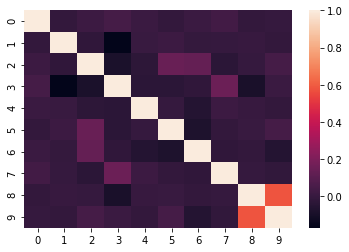

Key:
0 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5785170381294951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
# sentence similarity among the 10 authors 

X_test_lsa = lsa.fit_transform(X_test_tfidf)

# with the test set data.  
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_test_tfidf).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

## Conclusion Analysis

- Clustering was not the best method for this task While some cluster were able to be dominated by specific authors, the k-means method of clustering failed in the task of classifying the correct text for each author. The majory of the text ended up being in a specific cluster and clusters 4 and 5 were almost empty.
- The best performing models included Logistic regression, SVM and gradient boosted classifier. However, each of the models deomstrated a large gap between the results of the holdout group and the results of test group. For this kind of data logistric regression most likely performed the best due to the reduction of the large feature space
- TF-dif methods performed much better than BoW method and engender more accurate results 
- the sentence similarity shows there not to be a large difference between the different authors and suggest that to imporve this project, more data or a more intensive cleaning process is needed.






